# 🔧 Preprocesamiento de Texto
## Pipeline completo de limpieza y normalización

### Objetivos:
1. Implementar pipeline de preprocesamiento completo
2. Limpiar y normalizar el texto
3. Aplicar tokenización, eliminación de stopwords y lematización
4. Guardar datos preprocesados
5. Comparar texto original vs preprocesado


## 1. Importar librerías


In [1]:
import pandas as pd
import numpy as np
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Añadir src al path para importar módulos
sys.path.append(str(Path('../src').resolve()))

from data.preprocessing import TextPreprocessor

print("✅ Librerías importadas")


✅ Librerías importadas


## 2. Cargar datos


In [2]:
# Cargar dataset
data_path = Path('../data/raw/youtoxic_english_1000.csv')
df = pd.read_csv(data_path)

print(f"✅ Dataset cargado: {len(df)} filas, {len(df.columns)} columnas")
print(f"\n📋 Primeras filas:")
df.head()


✅ Dataset cargado: 1000 filas, 15 columnas

📋 Primeras filas:


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\r\nDont you reckon them 'black lives matter' ...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


## 3. Identificar columnas de texto y etiquetas


In [3]:
# Identificar columna de texto
text_col = 'Text'  # Según el EDA, esta es la columna de texto
label_col = 'IsToxic'  # Columna principal de etiquetas

# Verificar que existen
assert text_col in df.columns, f"Columna '{text_col}' no encontrada"
assert label_col in df.columns, f"Columna '{label_col}' no encontrada"

print(f"✅ Columna de texto: '{text_col}'")
print(f"✅ Columna de etiquetas: '{label_col}'")

# Verificar valores nulos
print(f"\n🔍 Valores nulos en '{text_col}': {df[text_col].isnull().sum()}")
print(f"🔍 Valores nulos en '{label_col}': {df[label_col].isnull().sum()}")

# Eliminar filas con texto nulo
df = df.dropna(subset=[text_col])
print(f"\n✅ Dataset después de eliminar nulos: {len(df)} filas")


✅ Columna de texto: 'Text'
✅ Columna de etiquetas: 'IsToxic'

🔍 Valores nulos en 'Text': 0
🔍 Valores nulos en 'IsToxic': 0

✅ Dataset después de eliminar nulos: 1000 filas


## 4. Inicializar preprocesador


In [4]:
# Inicializar preprocesador (usa spaCy si está disponible)
preprocessor = TextPreprocessor(use_spacy=True)

print("✅ Preprocesador inicializado")
print(f"   Usando: {'spaCy' if preprocessor.use_spacy else 'NLTK'}")


✅ spaCy cargado: en_core_web_sm
✅ Preprocesador inicializado
   Usando: spaCy


## 5. Ejemplos de preprocesamiento


In [5]:
# Mostrar ejemplos de preprocesamiento
print("="*80)
print("EJEMPLOS DE PREPROCESAMIENTO")
print("="*80)

sample_texts = df[text_col].sample(5, random_state=42).tolist()

for i, text in enumerate(sample_texts, 1):
    processed = preprocessor.preprocess_text(text, remove_stopwords=True)
    print(f"\n📝 Ejemplo {i}:")
    print(f"   Original:  {text[:150]}..." if len(text) > 150 else f"   Original:  {text}")
    print(f"   Procesado: {processed[:150]}..." if len(processed) > 150 else f"   Procesado: {processed}")


EJEMPLOS DE PREPROCESAMIENTO

📝 Ejemplo 1:
   Original:  You call yourself an anarchist but defend a cop shooting an unarmed civilian. I'm highly disappointed. At the beginning of your video you referred to ...
   Procesado: anarchist defend cop shoot unarmed civilian m highly disappointed beginning video refer square didn t know blunt s bad stefan incredibly touch evidenc...

📝 Ejemplo 2:
   Original:  My mother told me the same thing.  God Bless this woman.
   Procesado: mother tell thing god bless woman

📝 Ejemplo 3:
   Original:  Love it I same the saem thing Go Peggy!  #stupid  
Ya Killing ya selves more quicker than  STLPD could ever  #wakeup
   Procesado: love saem thing peggy stupid ya kill ya self quick stlpd wakeup

📝 Ejemplo 4:
   Original:  Next time they do that, line up some cars and start making burnout smoke to "riot gas" them. Non lethal and eficient. (Double check if it actualy is n...
   Procesado: time line car start make burnout smoke riot gas non lethal eficient d

## 6. Aplicar preprocesamiento a todo el dataset


In [6]:
# Aplicar preprocesamiento
print("="*80)
print("PREPROCESANDO DATASET COMPLETO")
print("="*80)
print("⏳ Esto puede tardar unos minutos...\n")

df_processed = preprocessor.preprocess_dataframe(
    df, 
    text_column=text_col,
    output_column='Text_processed',
    remove_stopwords=True,
    show_progress=True
)

print(f"\n✅ Preprocesamiento completado")
print(f"   Filas procesadas: {len(df_processed)}")


PREPROCESANDO DATASET COMPLETO
⏳ Esto puede tardar unos minutos...



Preprocesando texto: 100%|██████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.97it/s]


✅ Preprocesamiento completado
   Filas procesadas: 1000


## 7. Análisis del preprocesamiento


In [7]:
# Calcular estadísticas
df_processed['text_length_original'] = df_processed[text_col].str.len()
df_processed['text_length_processed'] = df_processed['Text_processed'].str.len()
df_processed['word_count_original'] = df_processed[text_col].str.split().str.len()
df_processed['word_count_processed'] = df_processed['Text_processed'].str.split().str.len()

print("="*80)
print("ESTADÍSTICAS DE PREPROCESAMIENTO")
print("="*80)

stats = pd.DataFrame({
    'Original': [
        df_processed['text_length_original'].mean(),
        df_processed['word_count_original'].mean(),
        df_processed['text_length_original'].min(),
        df_processed['text_length_original'].max()
    ],
    'Procesado': [
        df_processed['text_length_processed'].mean(),
        df_processed['word_count_processed'].mean(),
        df_processed['text_length_processed'].min(),
        df_processed['text_length_processed'].max()
    ]
}, index=['Longitud promedio (caracteres)', 'Palabras promedio', 'Longitud mínima', 'Longitud máxima'])

print("\n📊 Comparación:")
print(stats)

print(f"\n📉 Reducción promedio:")
print(f"   Caracteres: {((df_processed['text_length_original'].mean() - df_processed['text_length_processed'].mean()) / df_processed['text_length_original'].mean() * 100):.1f}%")
print(f"   Palabras: {((df_processed['word_count_original'].mean() - df_processed['word_count_processed'].mean()) / df_processed['word_count_original'].mean() * 100):.1f}%")


ESTADÍSTICAS DE PREPROCESAMIENTO

📊 Comparación:
                                Original  Procesado
Longitud promedio (caracteres)   185.985     98.252
Palabras promedio                 33.776     16.108
Longitud mínima                    3.000      0.000
Longitud máxima                 4474.000   2184.000

📉 Reducción promedio:
   Caracteres: 47.2%
   Palabras: 52.3%


## 8. Visualización de resultados


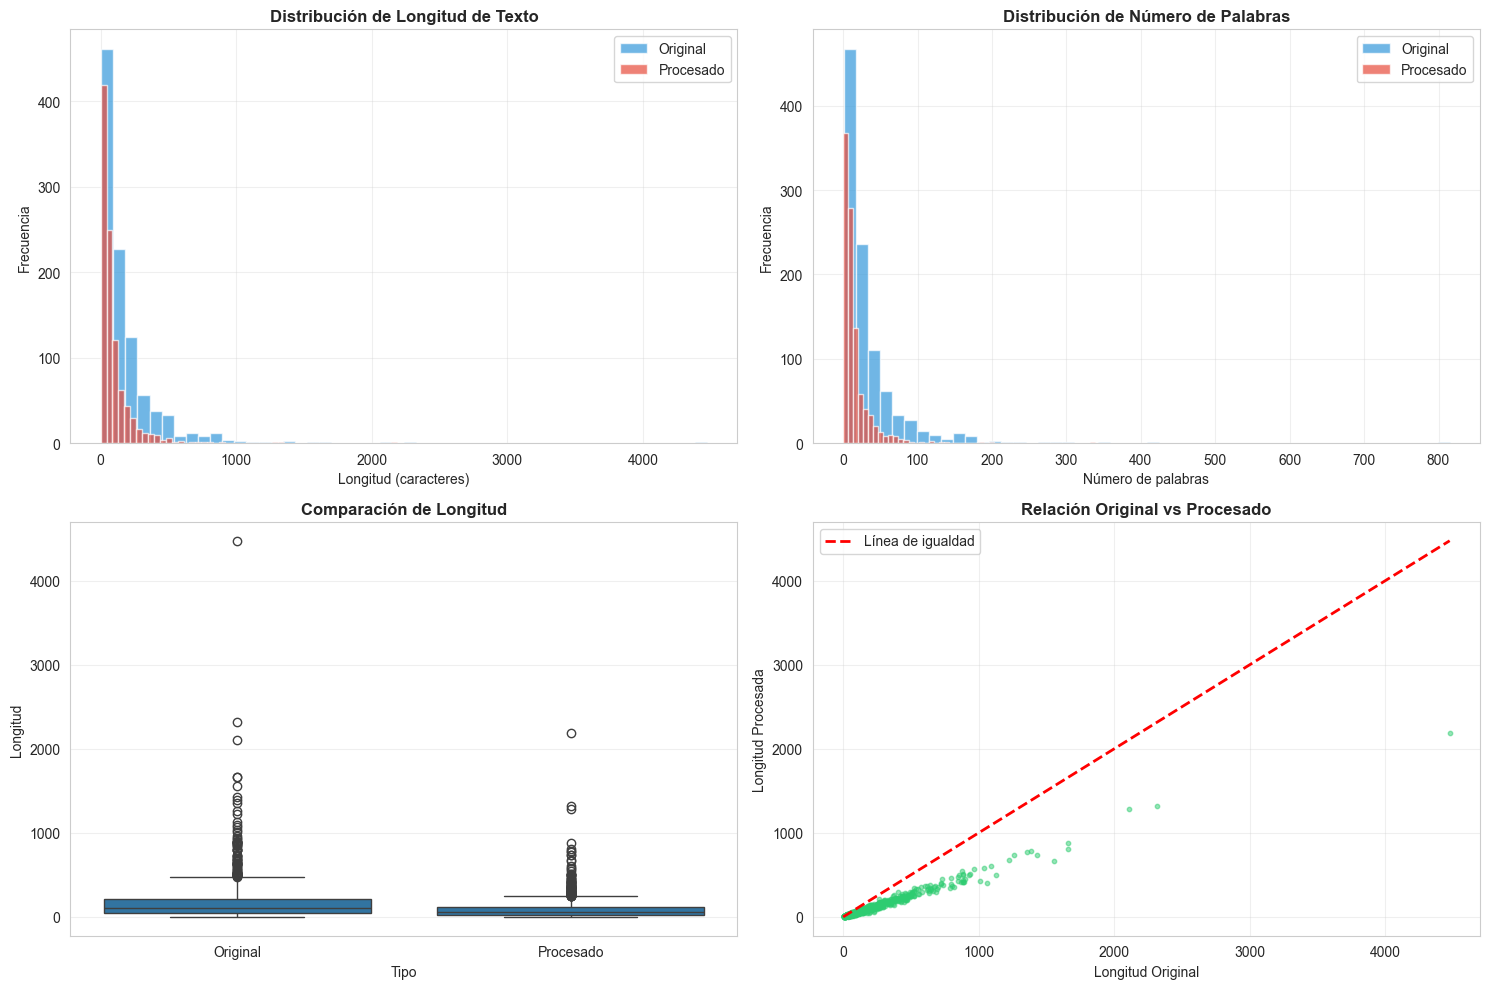

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma de longitud original vs procesada
axes[0, 0].hist(df_processed['text_length_original'], bins=50, alpha=0.7, label='Original', color='#3498db')
axes[0, 0].hist(df_processed['text_length_processed'], bins=50, alpha=0.7, label='Procesado', color='#e74c3c')
axes[0, 0].set_xlabel('Longitud (caracteres)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de Longitud de Texto', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Histograma de número de palabras
axes[0, 1].hist(df_processed['word_count_original'], bins=50, alpha=0.7, label='Original', color='#3498db')
axes[0, 1].hist(df_processed['word_count_processed'], bins=50, alpha=0.7, label='Procesado', color='#e74c3c')
axes[0, 1].set_xlabel('Número de palabras')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de Número de Palabras', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Boxplot comparativo
df_box = pd.melt(df_processed, 
                 value_vars=['text_length_original', 'text_length_processed'],
                 var_name='Tipo', value_name='Longitud')
df_box['Tipo'] = df_box['Tipo'].replace({'text_length_original': 'Original', 'text_length_processed': 'Procesado'})
sns.boxplot(data=df_box, x='Tipo', y='Longitud', ax=axes[1, 0])
axes[1, 0].set_title('Comparación de Longitud', fontweight='bold')
axes[1, 0].grid(alpha=0.3, axis='y')

# Scatter plot: original vs procesado
axes[1, 1].scatter(df_processed['text_length_original'], df_processed['text_length_processed'], 
                   alpha=0.5, s=10, color='#2ecc71')
axes[1, 1].plot([0, df_processed['text_length_original'].max()], 
                [0, df_processed['text_length_original'].max()], 
                'r--', linewidth=2, label='Línea de igualdad')
axes[1, 1].set_xlabel('Longitud Original')
axes[1, 1].set_ylabel('Longitud Procesada')
axes[1, 1].set_title('Relación Original vs Procesado', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [9]:
# Guardar dataset preprocesado
output_path = Path('../data/processed/youtoxic_english_1000_processed.csv')
output_path.parent.mkdir(parents=True, exist_ok=True)

# Guardar solo columnas necesarias
columns_to_save = ['CommentId', 'VideoId', text_col, 'Text_processed', label_col]
if 'IsAbusive' in df_processed.columns:
    columns_to_save.append('IsAbusive')
if 'IsHatespeech' in df_processed.columns:
    columns_to_save.append('IsHatespeech')

df_processed[columns_to_save].to_csv(output_path, index=False)

print("="*80)
print("DATOS GUARDADOS")
print("="*80)
print(f"✅ Dataset preprocesado guardado en: {output_path}")
print(f"   Filas: {len(df_processed)}")
print(f"   Columnas: {len(columns_to_save)}")
print(f"\n📋 Columnas guardadas: {columns_to_save}")

# Mostrar muestra
print(f"\n📋 Muestra de datos guardados:")
df_processed[columns_to_save].head()


DATOS GUARDADOS
✅ Dataset preprocesado guardado en: ../data/processed/youtoxic_english_1000_processed.csv
   Filas: 1000
   Columnas: 7

📋 Columnas guardadas: ['CommentId', 'VideoId', 'Text', 'Text_processed', 'IsToxic', 'IsAbusive', 'IsHatespeech']

📋 Muestra de datos guardados:


,CommentId,VideoId,Text,Text_processed,IsToxic,IsAbusive,IsHatespeech
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,people step case wasn t people situation lump ...,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,law enforcement train shoot apprehend train sh...,True,True,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\r\nDont you reckon them 'black lives matter' ...,not reckon black life matter banner hold white...,True,True,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,large number people like police officer call c...,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",arab dude absolutely right shoot 6 extra time ...,False,False,False


## 10. Resumen del preprocesamiento


In [10]:
print("="*80)
print("RESUMEN DEL PREPROCESAMIENTO")
print("="*80)

print(f"\n✅ Pipeline aplicado:")
print(f"   1. Limpieza básica (URLs, emails, caracteres especiales)")
print(f"   2. Normalización (contracciones, repeticiones)")
print(f"   3. Tokenización ({'spaCy' if preprocessor.use_spacy else 'NLTK'})")
print(f"   4. Eliminación de stopwords")
print(f"   5. Lematización")

print(f"\n📊 Resultados:")
print(f"   - Textos procesados: {len(df_processed)}")
print(f"   - Reducción promedio de caracteres: {((df_processed['text_length_original'].mean() - df_processed['text_length_processed'].mean()) / df_processed['text_length_original'].mean() * 100):.1f}%")
print(f"   - Reducción promedio de palabras: {((df_processed['word_count_original'].mean() - df_processed['word_count_processed'].mean()) / df_processed['word_count_original'].mean() * 100):.1f}%")

print(f"\n💾 Archivo guardado:")
print(f"   {output_path}")

print("\n✅ Preprocesamiento completado exitosamente")


RESUMEN DEL PREPROCESAMIENTO

✅ Pipeline aplicado:
   1. Limpieza básica (URLs, emails, caracteres especiales)
   2. Normalización (contracciones, repeticiones)
   3. Tokenización (spaCy)
   4. Eliminación de stopwords
   5. Lematización

📊 Resultados:
   - Textos procesados: 1000
   - Reducción promedio de caracteres: 47.2%
   - Reducción promedio de palabras: 52.3%

💾 Archivo guardado:
   ../data/processed/youtoxic_english_1000_processed.csv

✅ Preprocesamiento completado exitosamente
